In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt            
import seaborn as sns

df = pd.read_csv("DS1_C5_S1_EmployeeAttrition_Data_Practice.csv")

In [2]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


# Task 1
Display the basic information about the dataset, which includes column names, count of non-null records, and data type of the columns. Also, display the count of missing values for each column.

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

In [5]:
df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

# Task 2
Define a function that identifies the data type of columns as categorical or numerical.
Separate the names of categorical columns and numerical columns and save them in two different lists.

In [6]:
def separate_data(df):
    categorical = []
    continuous = []
    for i in df.columns:
        if df[i].nunique() < 20:
            categorical.append(i)
        else:
            continuous.append(i)
            
    return categorical, continuous
categorical, continuous = separate_data(df)

from tabulate import tabulate
table = [categorical,continuous]
print(tabulate({"Categorical":categorical, "Continuous":continuous}, headers= ["categorical","continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            DistanceFromHome
Department                EmployeeNumber
EducationField            HourlyRate
EnvironmentSatisfaction   MonthlyIncome
Gender                    TotalWorkingYears
JobInvolvement            YearsAtCompany
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


# Task 3
Perform descriptive analysis of each categorical column (identified in Task 2) by defining a function to print the following information.
- The number of categories (unique value) present in a column
• The mode of a column
• The missing values of a column
Perform the missing value treatment, if required.

In [7]:
def cat_info(col):
    print("Unique values:",df[col].unique())
    print("Count of unique values:",df[col].nunique())
    print("Mode:",df[col].mode()[0])
    print("Missing values :",df[col].isnull().sum())


In [8]:
cat_info("Attrition")

Unique values: ['Yes' 'No']
Count of unique values: 2
Mode: No
Missing values : 0


In [9]:
cat_info("BusinessTravel")

Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Count of unique values: 3
Mode: Travel_Rarely
Missing values : 30


In [10]:
df["BusinessTravel"].fillna(df["BusinessTravel"].mode()[0], inplace = True)  #missing value treatment

In [11]:
cat_info("BusinessTravel")

Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Count of unique values: 3
Mode: Travel_Rarely
Missing values : 0


In [12]:
cat_info("Department")

Unique values: ['Sales' 'Research & Development' 'Human Resources' nan]
Count of unique values: 3
Mode: Research & Development
Missing values : 4


In [13]:
cat_info("EducationField")

Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Count of unique values: 6
Mode: Life Sciences
Missing values : 12


In [14]:
cat_info("EnvironmentSatisfaction")

Unique values: [2 3 4 1]
Count of unique values: 4
Mode: 3
Missing values : 0


In [15]:
cat_info("Gender")

Unique values: ['Female' 'Male' nan]
Count of unique values: 2
Mode: Male
Missing values : 45


In [16]:
cat_info("JobInvolvement")

Unique values: [3 2 4 1]
Count of unique values: 4
Mode: 3
Missing values : 0


In [17]:
cat_info("JobRole")

Unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' nan 'Human Resources']
Count of unique values: 9
Mode: Sales Executive
Missing values : 10


In [18]:
cat_info("JobSatisfaction")

Unique values: [4 2 3 1]
Count of unique values: 4
Mode: 4
Missing values : 0


In [19]:
cat_info("MaritalStatus")

Unique values: ['Single' 'Married' nan 'Divorced']
Count of unique values: 3
Mode: Married
Missing values : 56


In [20]:
cat_info("NumCompaniesWorked")

Unique values: [8 1 6 9 0 4 5 2 7 3]
Count of unique values: 10
Mode: 1
Missing values : 0


In [21]:
cat_info("Over18")

Unique values: ['Y' nan]
Count of unique values: 1
Mode: Y
Missing values : 54


In [22]:
cat_info("OverTime")

Unique values: ['Yes' 'No']
Count of unique values: 2
Mode: No
Missing values : 0


In [23]:
cat_info("PerformanceRating")

Unique values: [3 4]
Count of unique values: 2
Mode: 3
Missing values : 0


In [24]:
cat_info("RelationshipSatisfaction")

Unique values: [1 4 2 3]
Count of unique values: 4
Mode: 3
Missing values : 0


In [25]:
cat_info("TrainingTimesLastYear")

Unique values: [0 3 2 5 1 4 6]
Count of unique values: 7
Mode: 2
Missing values : 0


In [26]:
cat_info("WorkLifeBalance")

Unique values: [1 3 2 4]
Count of unique values: 4
Mode: 3
Missing values : 0


In [27]:
cat_info("YearsInCurrentRole")

Unique values: [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
Count of unique values: 19
Mode: 2
Missing values : 0


In [28]:
cat_info("YearsSinceLastPromotion")

Unique values: [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
Count of unique values: 16
Mode: 0
Missing values : 0


In [29]:
cat_info("YearsWithCurrManager")

Unique values: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
Count of unique values: 18
Mode: 2
Missing values : 0


# Department

In [30]:
#missing value treatment for Department

In [31]:
df["Department"].fillna(df["Department"].mode()[0], inplace = True)  

In [32]:
cat_info("Department")

Unique values: ['Sales' 'Research & Development' 'Human Resources']
Count of unique values: 3
Mode: Research & Development
Missing values : 0


# EducationField

In [33]:
#missing value treatment for EducationField

In [34]:
df["EducationField"].fillna(df["EducationField"].mode()[0], inplace = True)  

In [35]:
cat_info("EducationField")

Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Count of unique values: 6
Mode: Life Sciences
Missing values : 0


# Gender

In [36]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)  

In [37]:
cat_info("Gender")

Unique values: ['Female' 'Male']
Count of unique values: 2
Mode: Male
Missing values : 0


# JobRole

In [38]:
df["JobRole"].fillna(df["JobRole"].mode()[0], inplace = True)  

In [39]:
cat_info("JobRole")

Unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Count of unique values: 9
Mode: Sales Executive
Missing values : 0


# MaritalStatus

In [40]:
df["MaritalStatus"].fillna(df["MaritalStatus"].mode()[0], inplace = True)  

In [41]:
cat_info("MaritalStatus")

Unique values: ['Single' 'Married' 'Divorced']
Count of unique values: 3
Mode: Married
Missing values : 0


# Over18

In [42]:
df["Over18"].fillna(df["Over18"].mode()[0], inplace = True)  

In [43]:
cat_info("Over18")

Unique values: ['Y']
Count of unique values: 1
Mode: Y
Missing values : 0


# Task 4
Perform descriptive analysis on categorical columns with the help of univariate graphs/charts, as mentioned below:
- Use the 'Attrition' column to display the count of attrited and existing employees using a bar chart and percentage of attrited and existing employees using a pie chart.
- Use the 'Business_Travel' column to display the employee count by the type of business travel using a bar chart and the employee percentage by the type of business travel using a pie chart.

- Use the 'Department' column to display the department-wise employee count using a bar chart and department-wise employee allocation percentage using a pie chart.
- Use the 'EducationField' column to display the education-field wise employee count using a bar chart and its percentage using a pie chart.
- Use the 'EnvironmentSatisfaction' column to display the employee count by environment satisfaction score using a bar chart and display its percentage on the top of each bar.

- Use the 'Gender' column to display the gender-wise employee count using a bar chart and display the corresponding percentage on the top of each bar.
- Use the 'MaritalStatus' column to display the marital status-wise employee count using a bar chart and display the corresponding percentage on the top of-each bar.
- Use the 'OverTime' column to display the percentage of employees who are working beyond their shift time using a pie chart.

-  Use the 'PerformanceRating' column to display the performance rating-wise employee percentage using a pie chart.
- Use the 'WorkLifeBalance' column to display the employee percentage by work-life balance rating using a pie chart.
Note: If the dataset contains a greater number of categorical columns, similar analysis will have to be carried out for all other categorical columns.


In [44]:
def cat_chart(col):
    dist= df[col].value_counts()
    fig, ax=plt.subplots(1,2, figsize= (15,6))       
    ax[0].set_title("count of"+str(col))           
    labels= list(dist. index)                             

    sns.countplot(x= df[col], ax= ax[0])              
    plt.pie(dist, labels= labels, autopct="%0.2f%%")      

    plt.show()

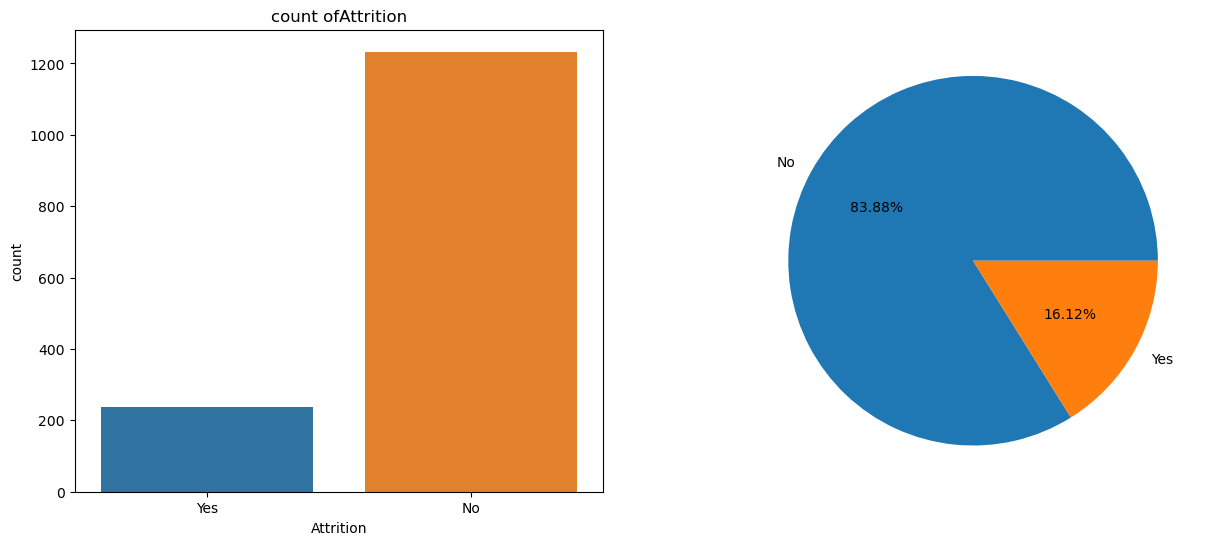

In [45]:
cat_chart("Attrition")

# interpretation:
- By the above analysis , There are about 84 % is "NO" and 16.12 %  "Yes"

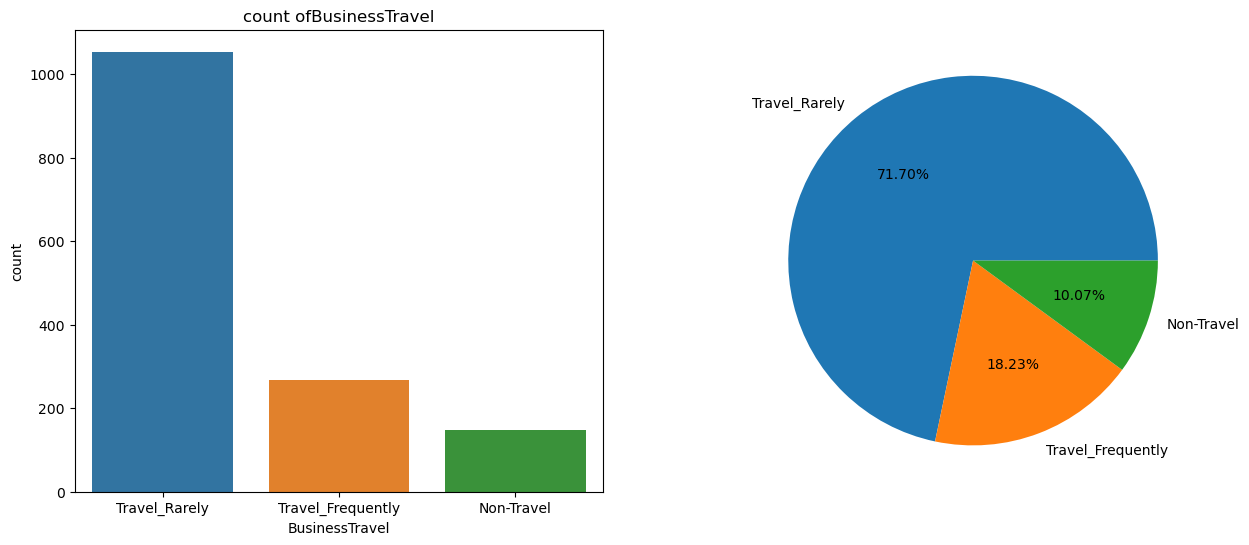

In [46]:
cat_chart("BusinessTravel")

# Interpretation:
- By the above analysis Travel_Rarely is 71.11% 
- Travel_Frequently and Non-Travel is 28.89%

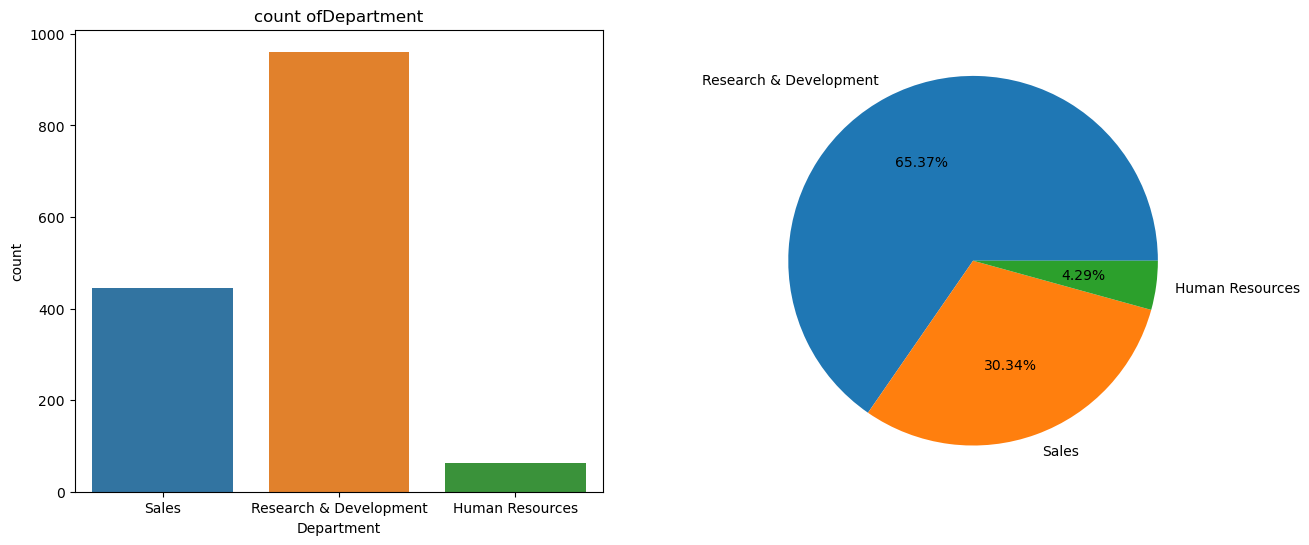

In [47]:
cat_chart("Department")

In [48]:
#65.37% is Research and development

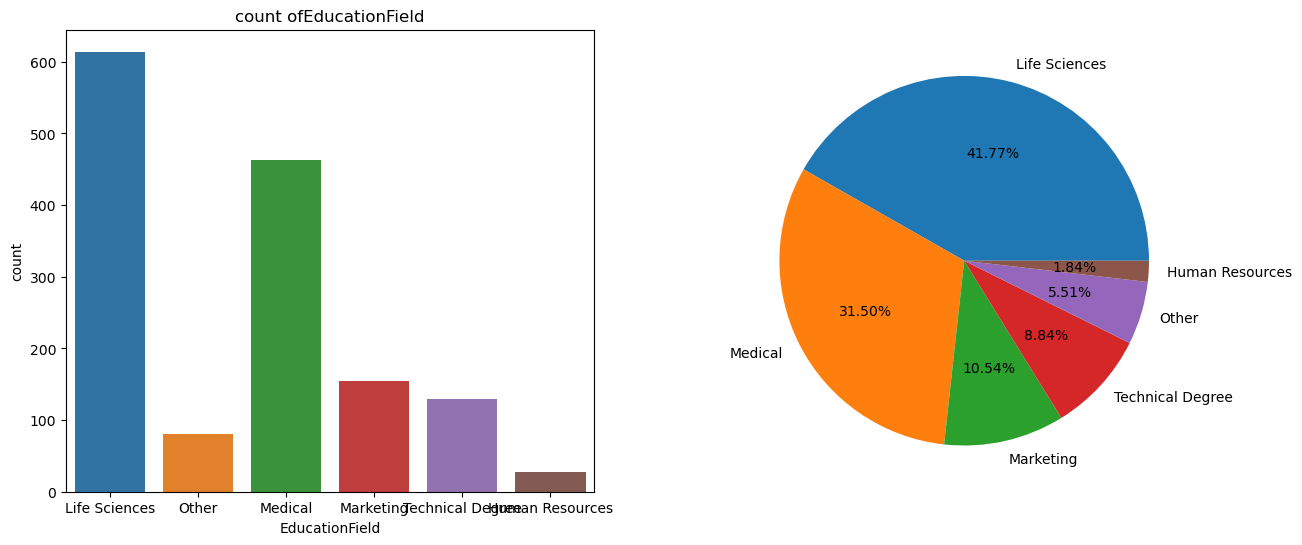

In [49]:
cat_chart("EducationField")

41.77% is life sciences

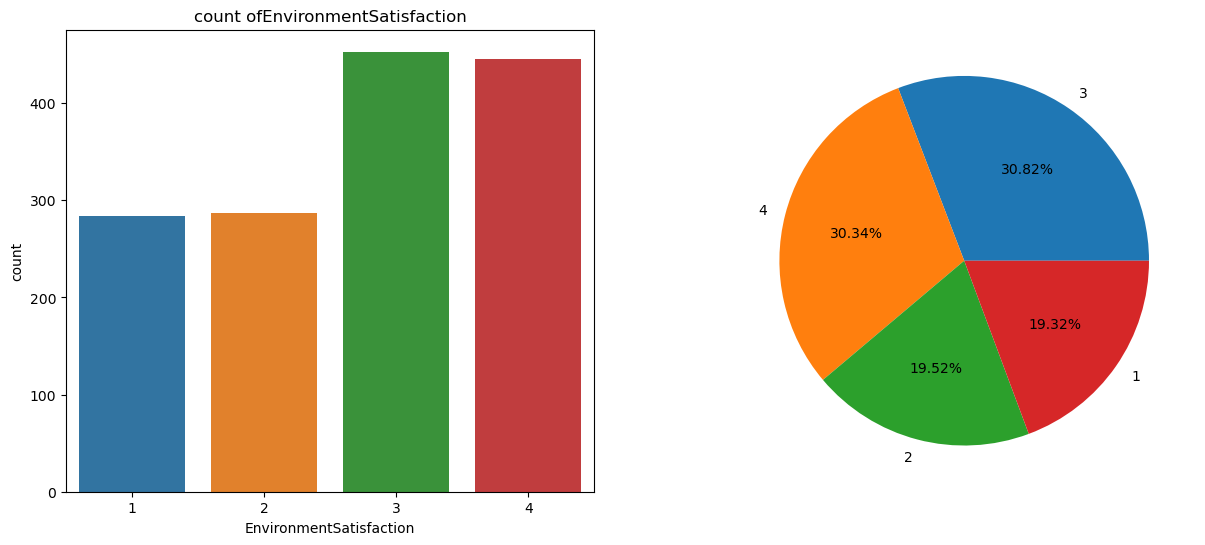

In [50]:
cat_chart("EnvironmentSatisfaction")

EnvironmentSatisfaction 3 has given by 30.82% and 3 is given by 30.34%

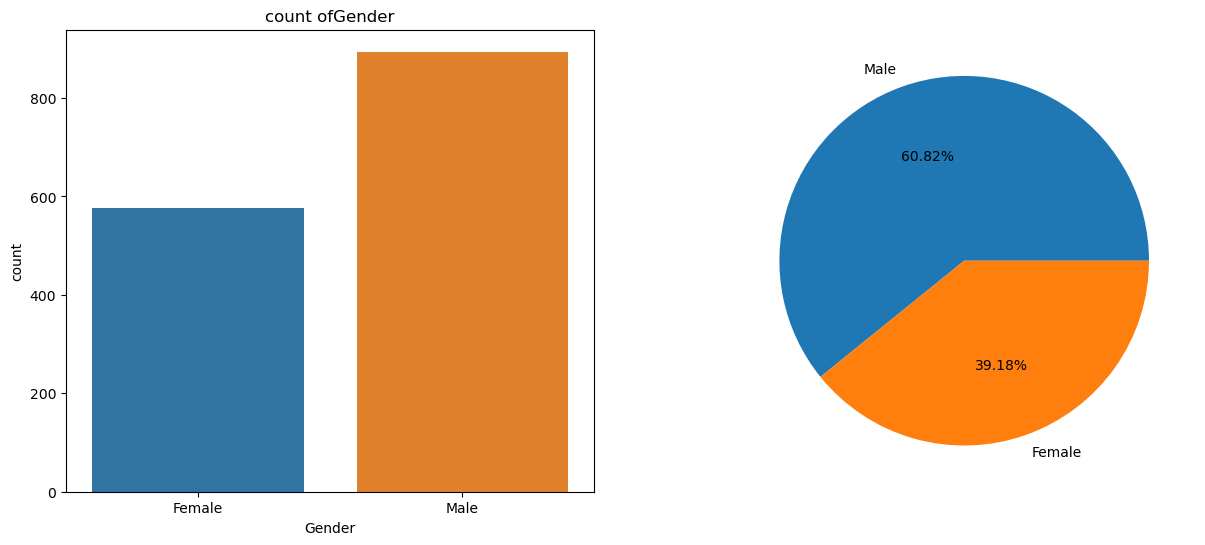

In [51]:
cat_chart("Gender")

61% are male and 39.18% are female

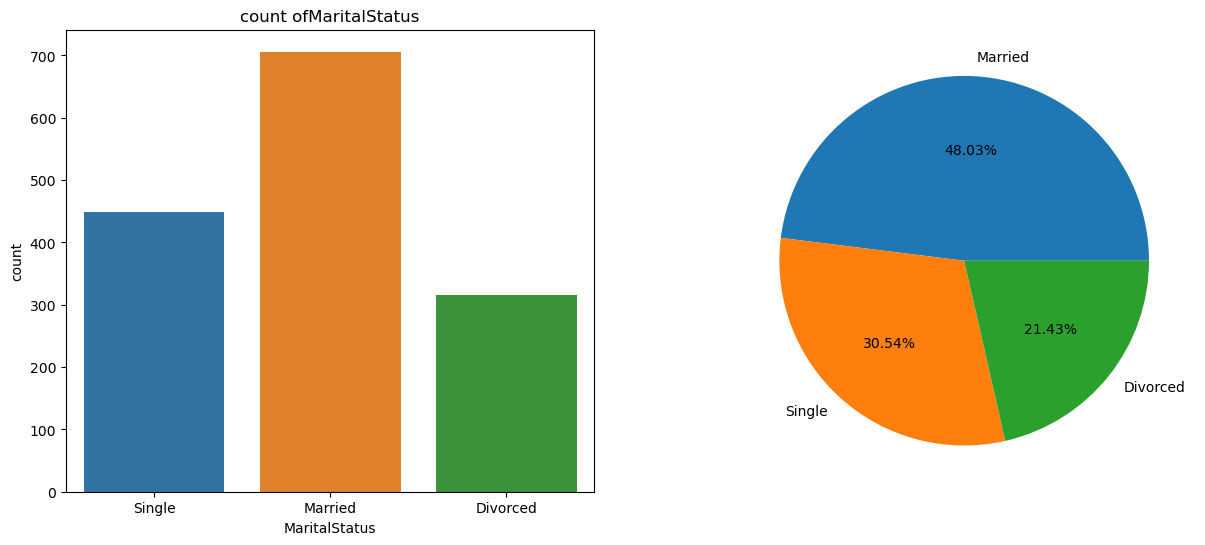

In [52]:
 cat_chart("MaritalStatus")

48.03% are married

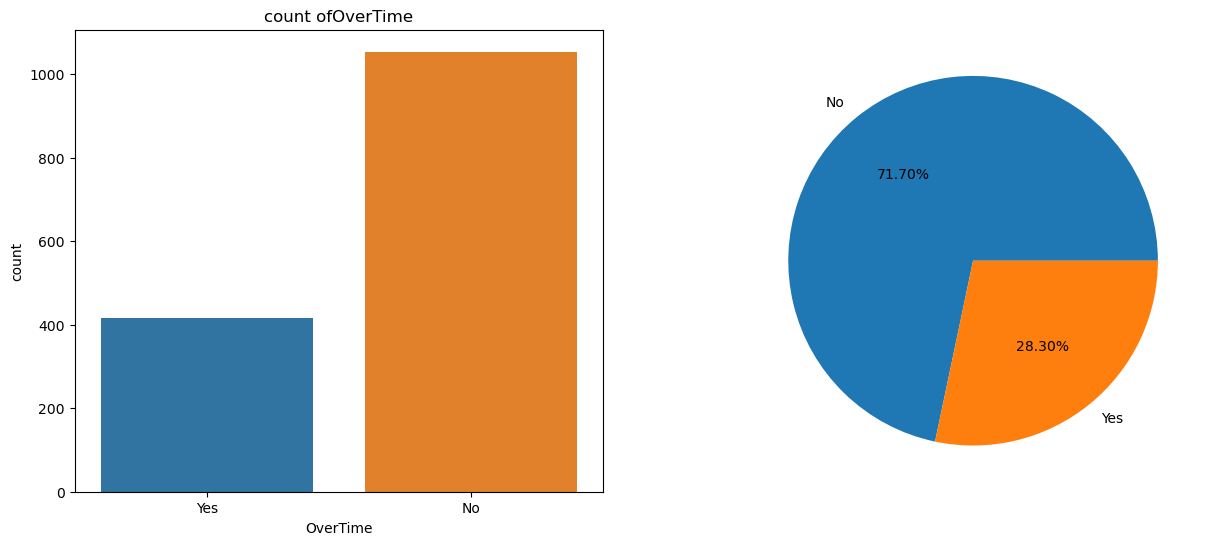

In [53]:
 cat_chart("OverTime")

Overtime Yes is 28.30% and no is 71.70%

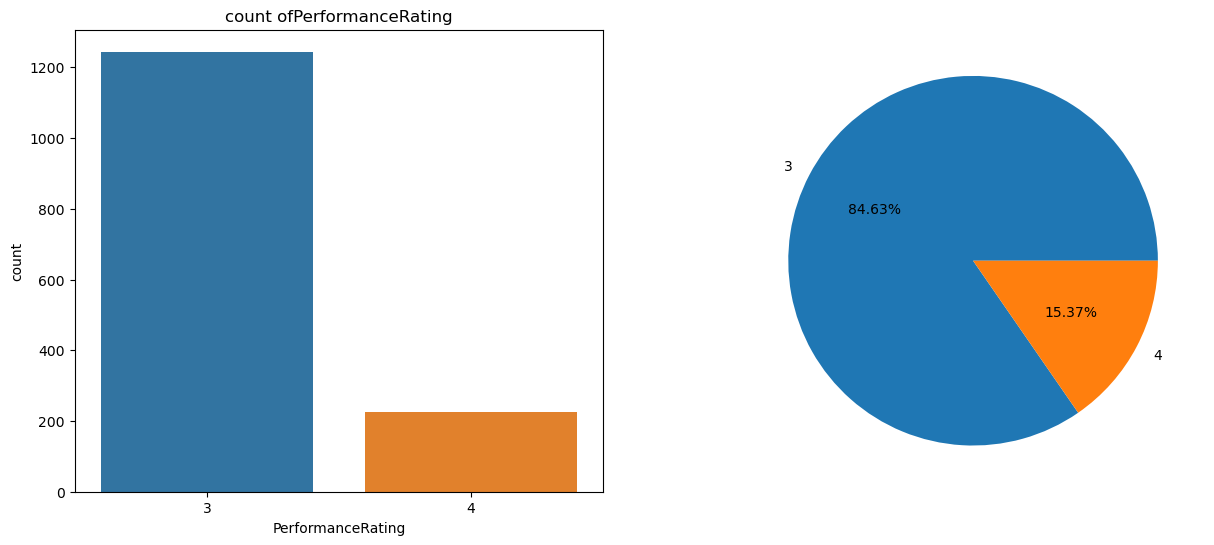

In [54]:
 cat_chart("PerformanceRating")

performance rating 3 is 84.63

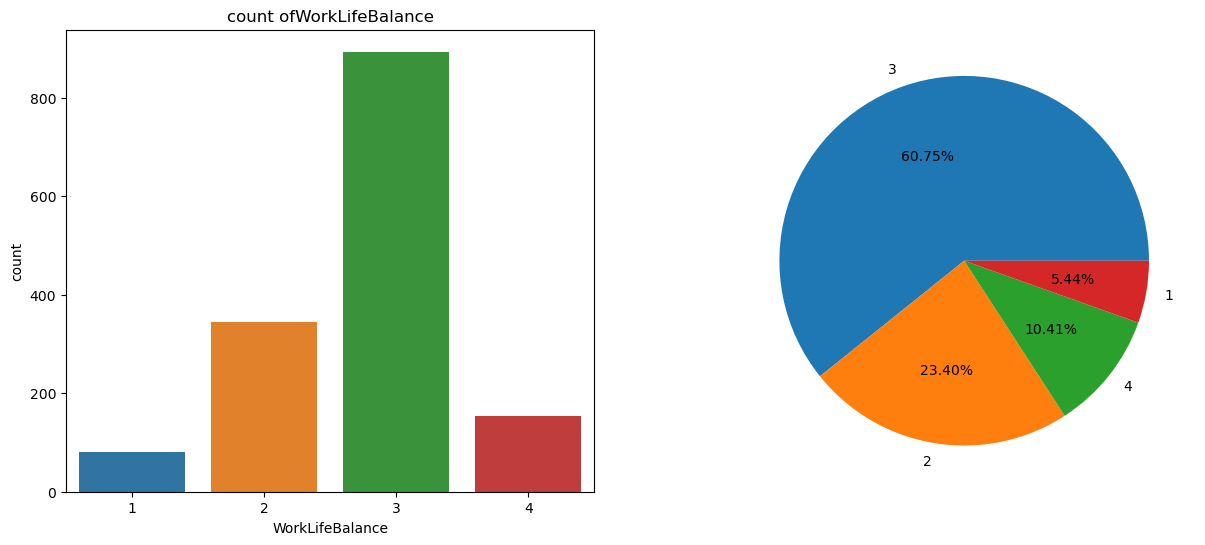

In [55]:
 cat_chart("WorkLifeBalance")

60.75% has given 3 as worklifebalance

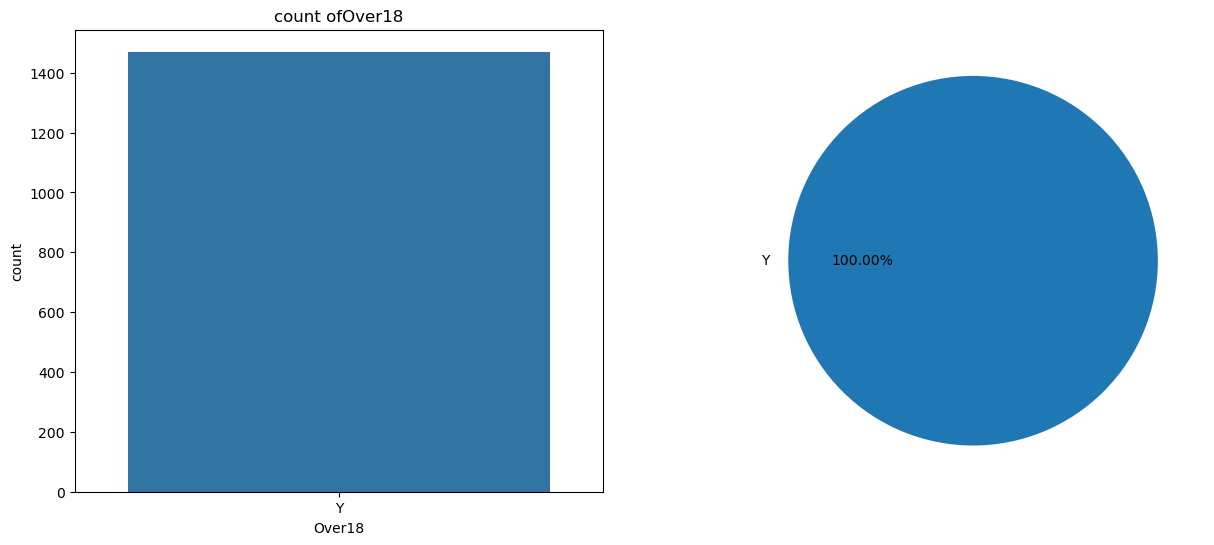

In [56]:
 cat_chart("Over18")

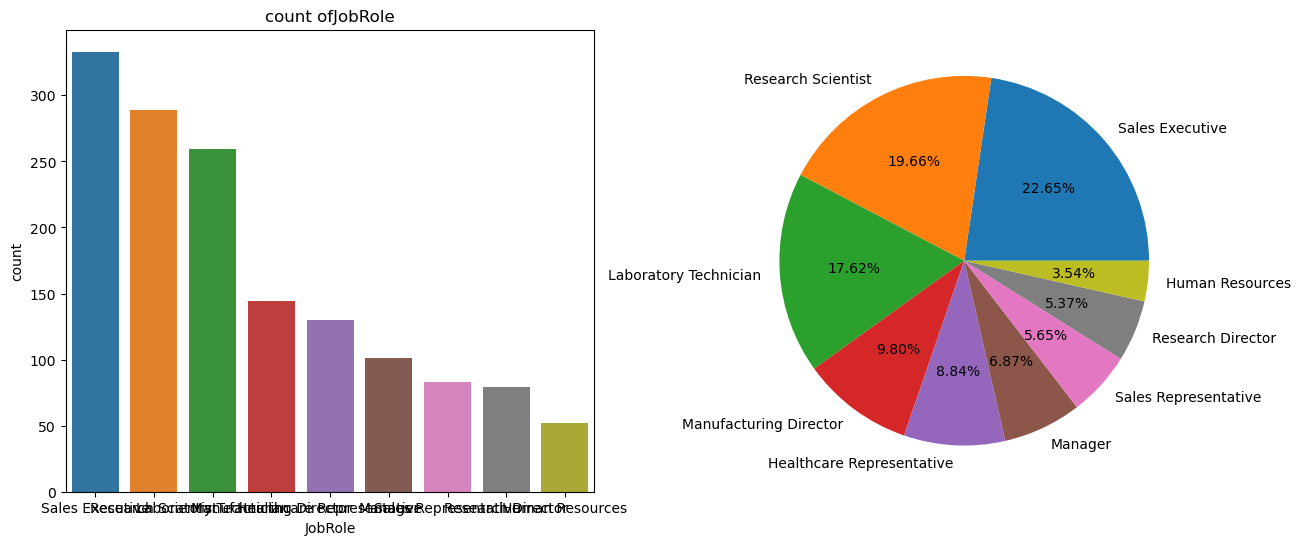

In [57]:
cat_chart("JobRole")

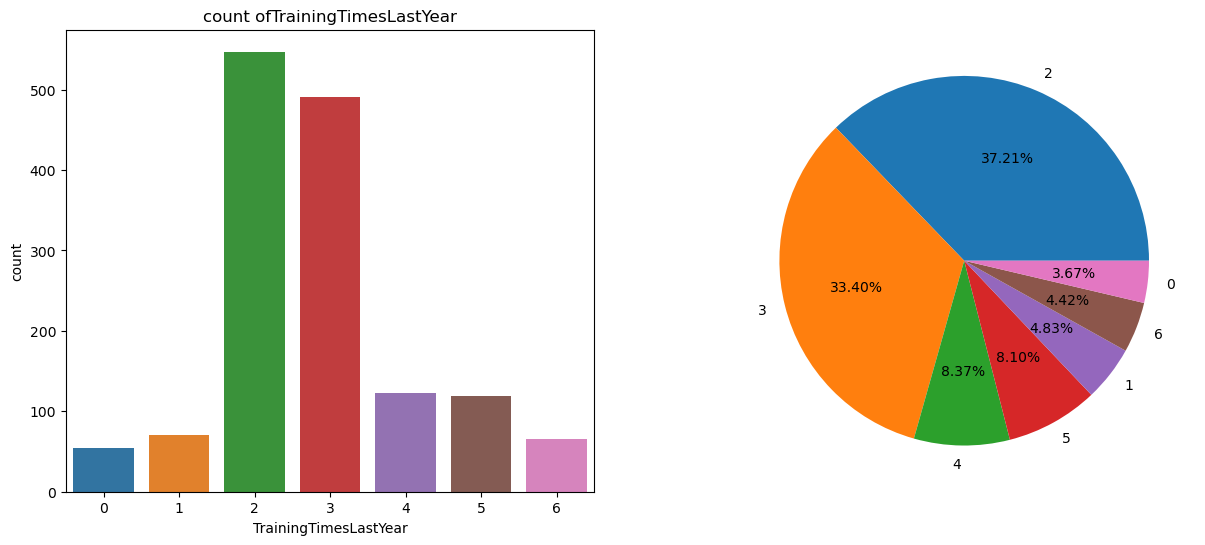

In [58]:
cat_chart("TrainingTimesLastYear")

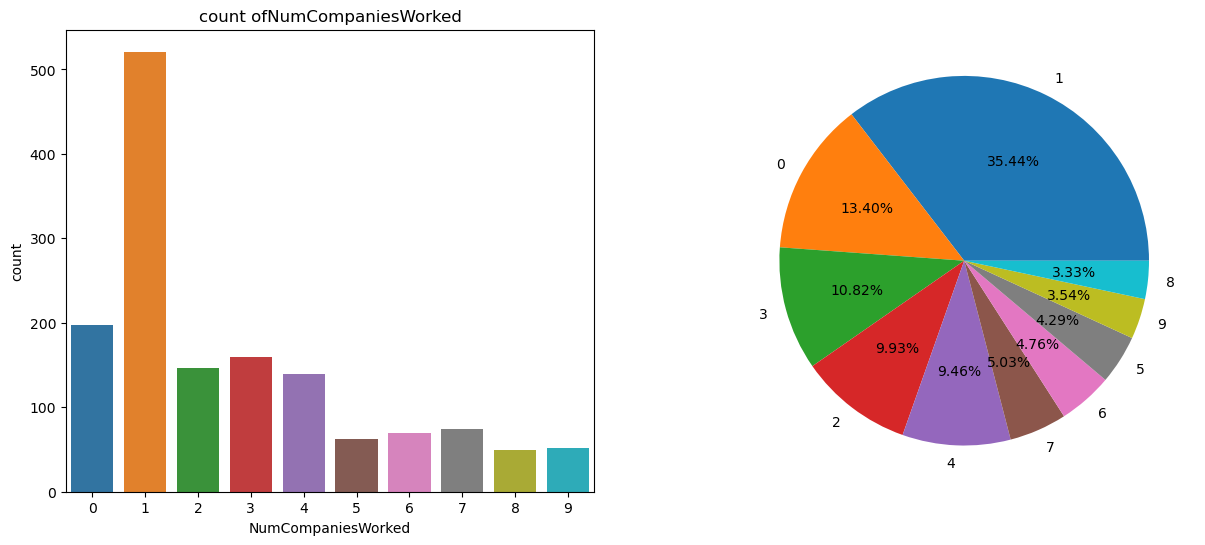

In [59]:
cat_chart("NumCompaniesWorked")

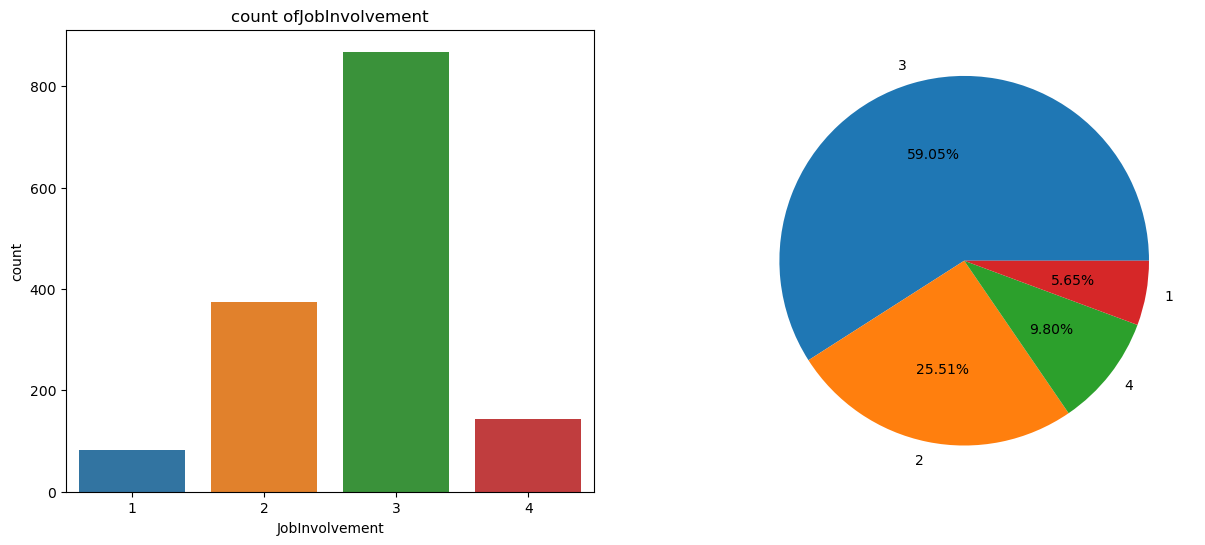

In [60]:
cat_chart("JobInvolvement")

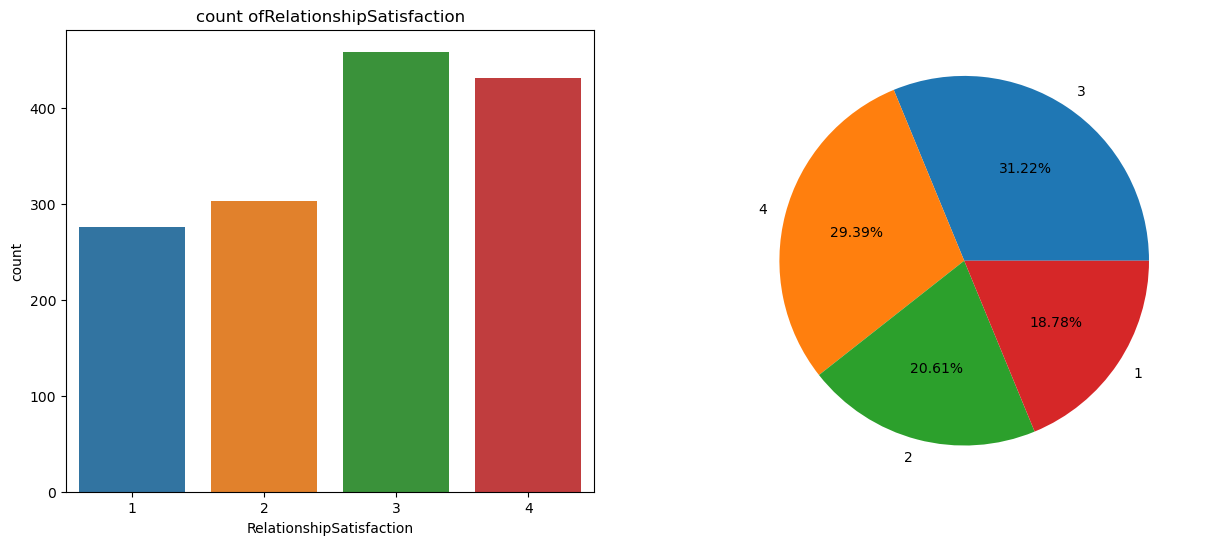

In [61]:
cat_chart("RelationshipSatisfaction")

# Task 5
Perform descriptive analysis of each numerical column by defining a function to print the following information.
- The measures of central tendency (mean, median)
• The standard deviation of a column
• The missing values of a column
• The skewness of a column
Perform the missing value treatment, if required.

In [62]:
def info_num(col):                    #numerical
    print(col)
    print("Mean:",df[col].mean())
    print("Median:",df[col].median())
    print("Standard deviation:",df[col].std())
    print("skewness", df[col].skew())
    print("Minimum value:",df[col].min())
    print("Maximum value:",df[col].max())
    print("Missing value:",df[col].isnull().sum())

In [63]:
info_num("Age")

Age
Mean: 36.93015214384509
Median: 36.0
Standard deviation: 9.16220404447615
skewness 0.4090238232052275
Minimum value: 18.0
Maximum value: 60.0
Missing value: 24


In [64]:
info_num("DistanceFromHome")

DistanceFromHome
Mean: 9.19251700680272
Median: 7.0
Standard deviation: 8.106864435666084
skewness 0.9581179956568269
Minimum value: 1
Maximum value: 29
Missing value: 0


In [65]:
info_num("EmployeeNumber")

EmployeeNumber
Mean: 1024.865306122449
Median: 1020.5
Standard deviation: 602.024334847475
skewness 0.016574019580105036
Minimum value: 1
Maximum value: 2068
Missing value: 0


In [66]:
info_num("HourlyRate")

HourlyRate
Mean: 65.89115646258503
Median: 66.0
Standard deviation: 20.329427593996158
skewness -0.03231095290044942
Minimum value: 30
Maximum value: 100
Missing value: 0


In [67]:
info_num("MonthlyIncome")

MonthlyIncome
Mean: 6502.931292517007
Median: 4919.0
Standard deviation: 4707.956783097995
skewness 1.3698166808390662
Minimum value: 1009
Maximum value: 19999
Missing value: 0


In [68]:
info_num("TotalWorkingYears")

TotalWorkingYears
Mean: 11.279591836734694
Median: 10.0
Standard deviation: 7.780781675515004
skewness 1.1171718528128527
Minimum value: 0
Maximum value: 40
Missing value: 0


In [69]:
info_num("YearsAtCompany")

YearsAtCompany
Mean: 7.0081632653061225
Median: 5.0
Standard deviation: 6.126525152403566
skewness 1.7645294543422085
Minimum value: 0
Maximum value: 40
Missing value: 0


# Age

In [70]:
#missing value treatment

In [71]:
df["Age"].fillna(df["Age"].mean(), inplace = True)

In [72]:
info_num("Age")

Age
Mean: 36.93015214384509
Median: 36.0
Standard deviation: 9.087051409165534
skewness 0.4123972471547611
Minimum value: 18.0
Maximum value: 60.0
Missing value: 0


# Task 6
Perform descriptive analysis with the help of univariate graphs/charts for the following numerical columns:
• Use the 'Age' column to display age-wise employee count distribution using a histogram and a box plot.
• Use the 'HourlyRate' column to display the hourly salary-wise employee count distribution using a histogram and a box plot.
• Use the 'MonthlyIncome' column to display the monthly salary-wise employee count using a histogram and a box plot.

In [73]:
def num_charts(col):
    fig, ax = plt.subplots(1,2, figsize=(15,8))
    sns.histplot(df[col], ax = ax[0], color= "m")
    sns.boxplot(df[col], ax = ax[1], color= "m")
    plt.show()

# Age

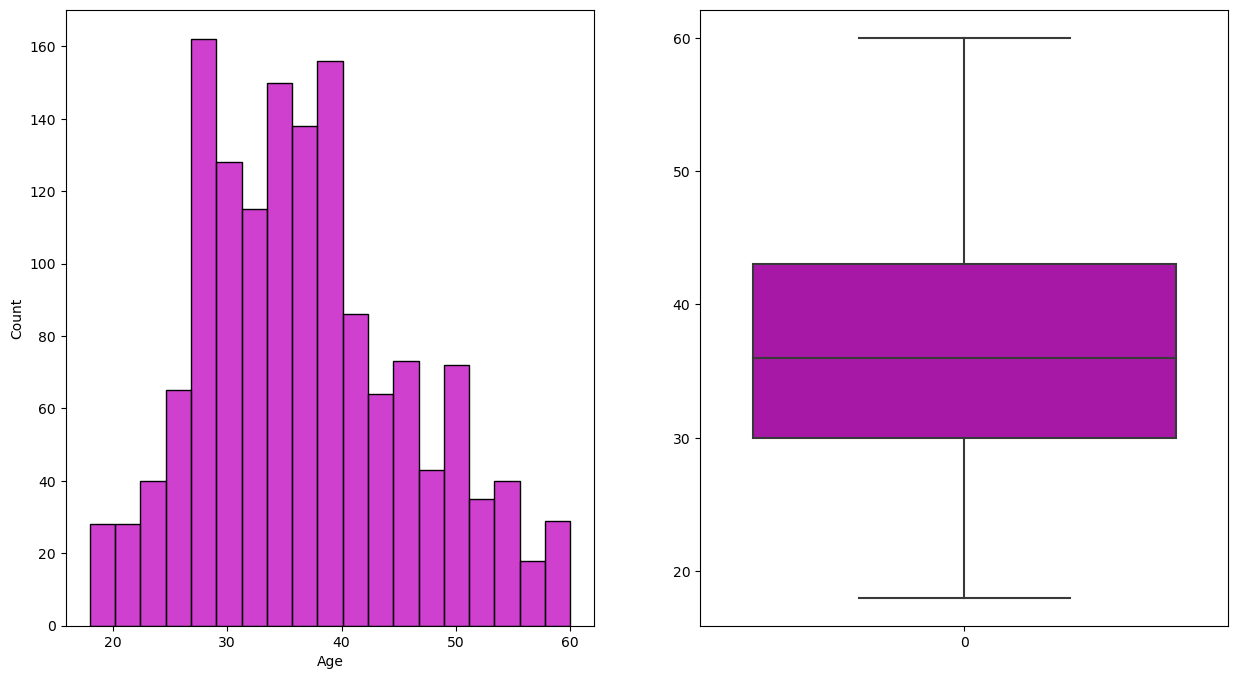

In [74]:
num_charts("Age")

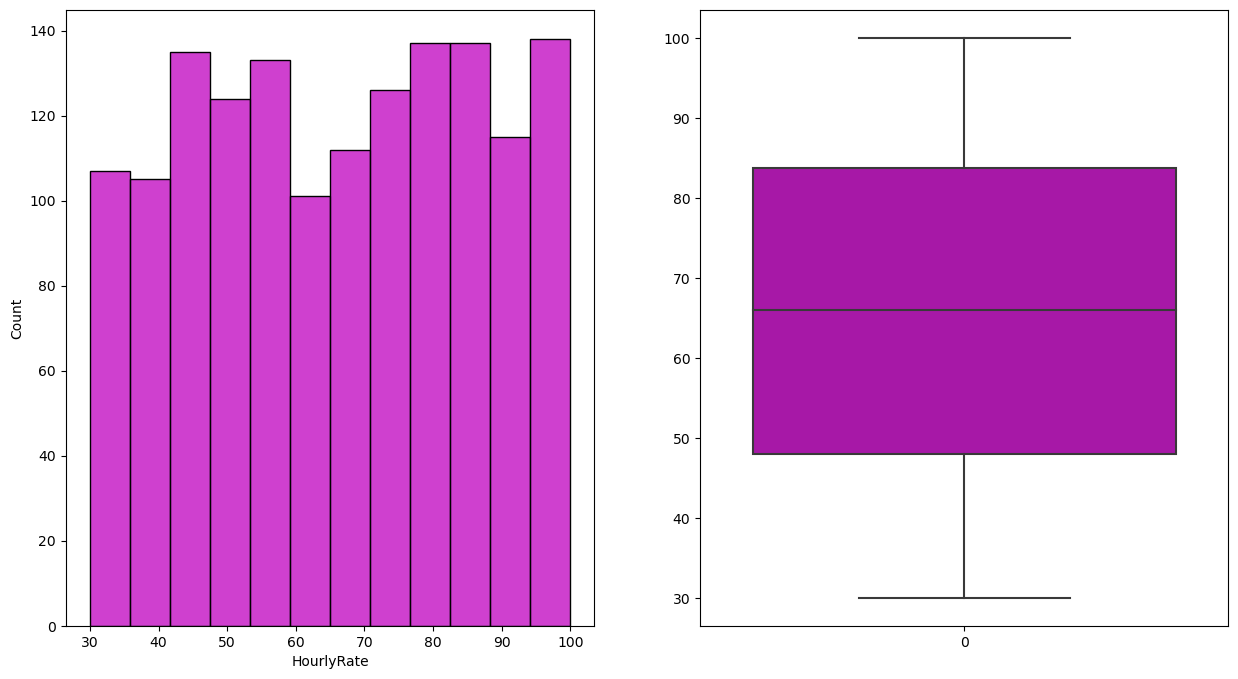

In [75]:
num_charts("HourlyRate")

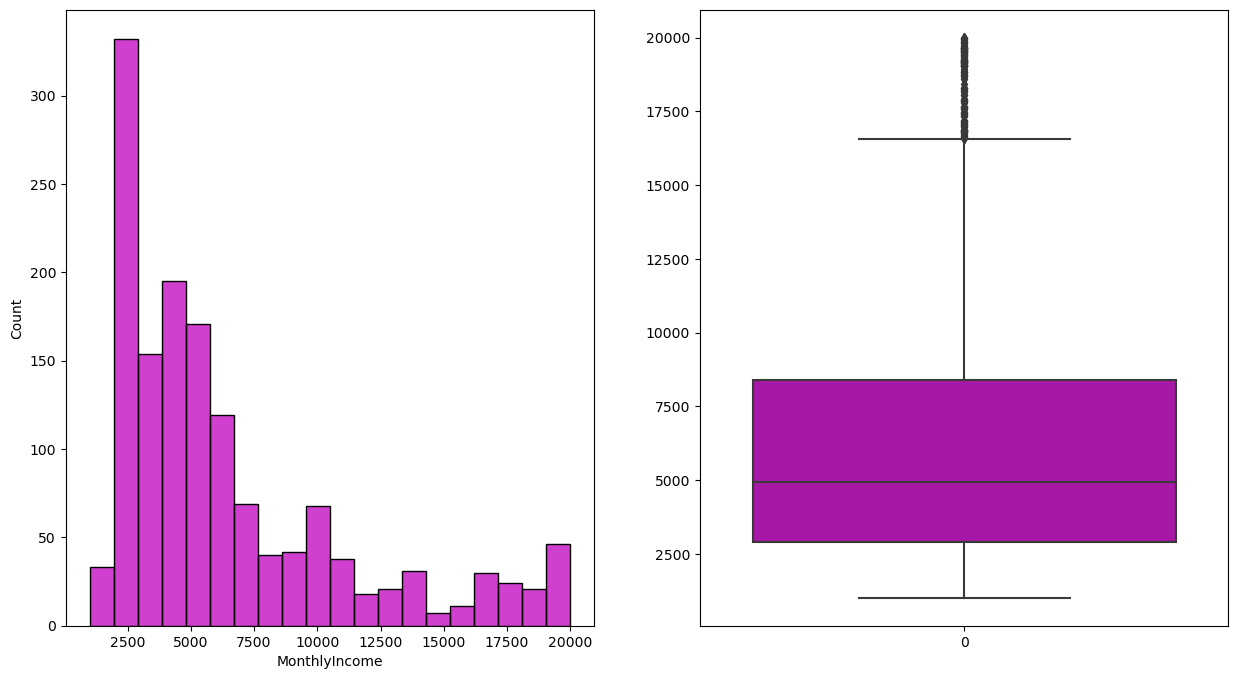

In [76]:
num_charts("MonthlyIncome")

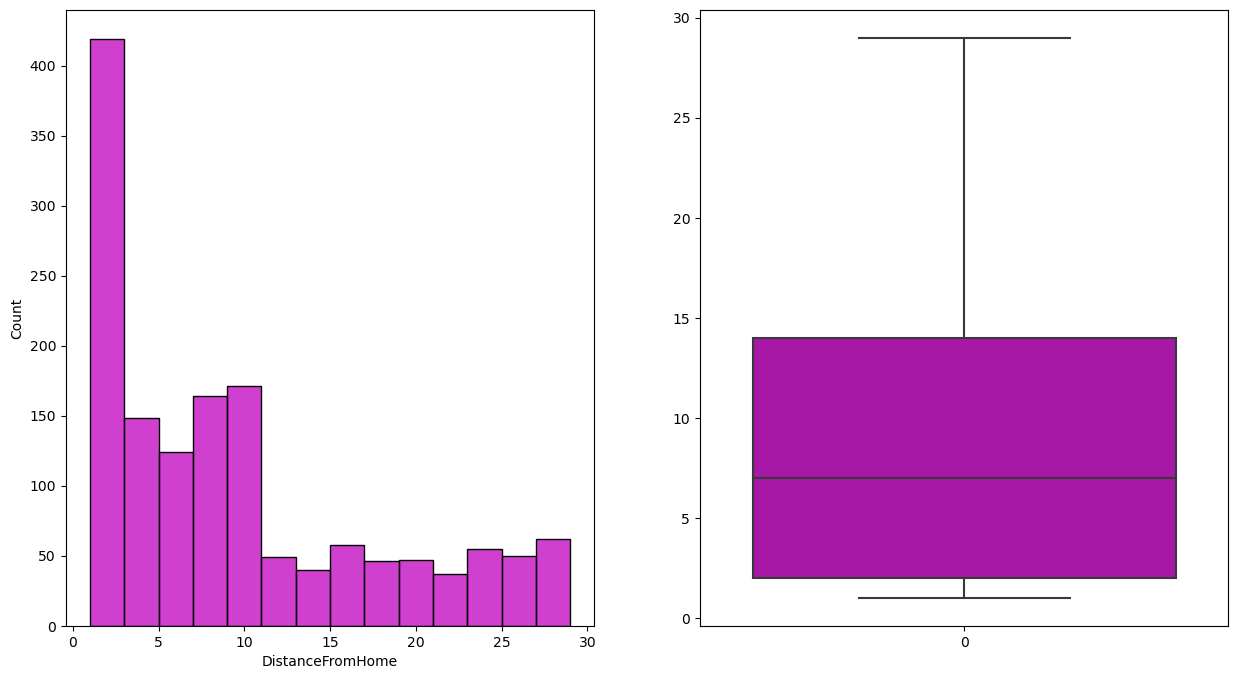

In [78]:
num_charts("DistanceFromHome")

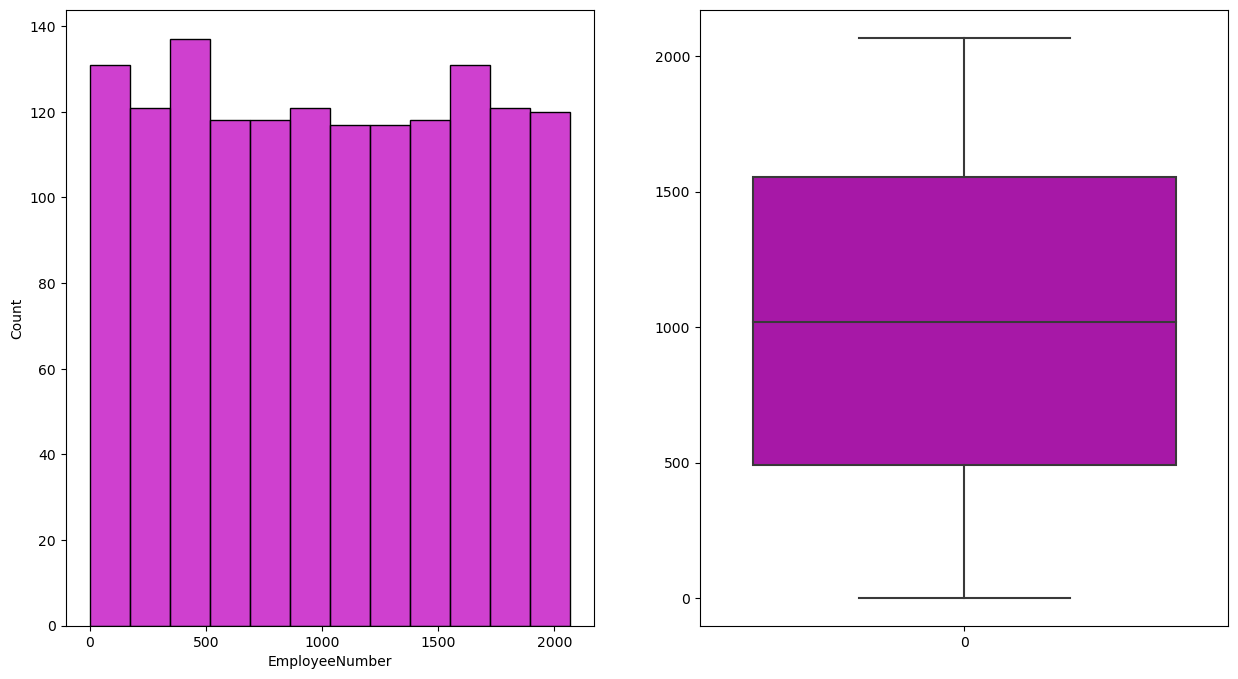

In [79]:
num_charts("EmployeeNumber")

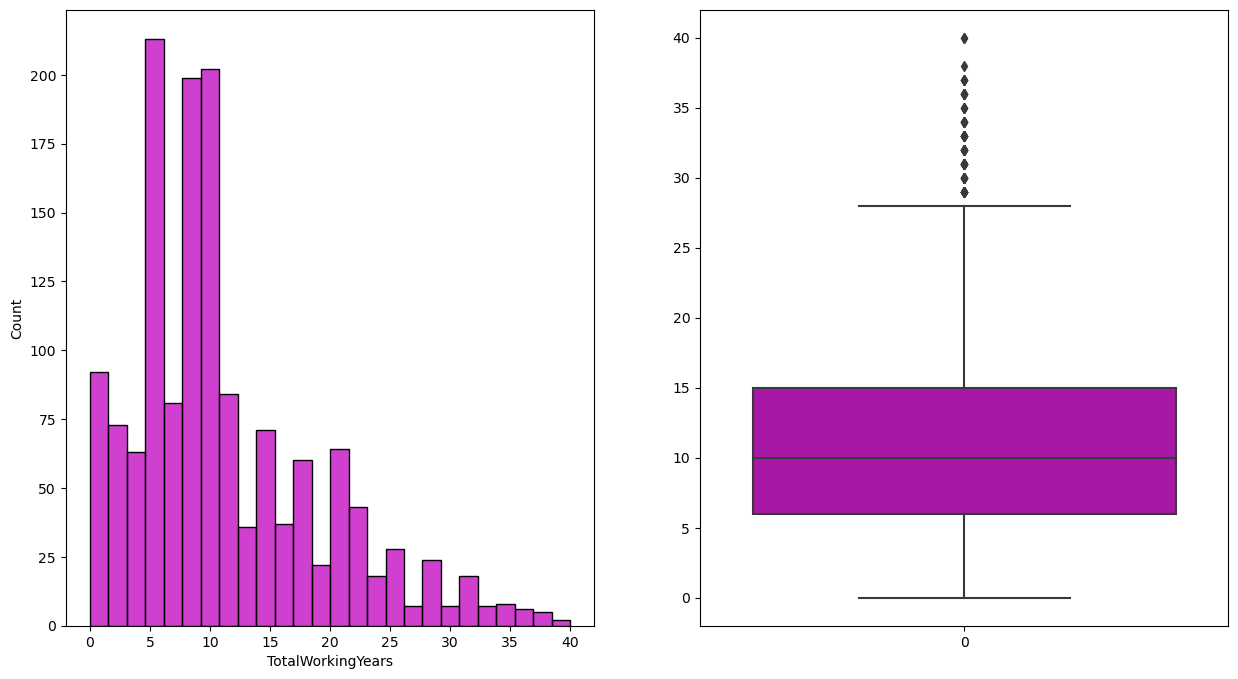

In [80]:
num_charts("TotalWorkingYears")